### 1. Background

The aim of this project is to analyze the effect of a webpage redesign on user behavior, as measured by the number of webpage views and button clicks. The goal is to determine whether the new design has a significant impact on user engagement, as indicated by an increase in button clicks and a corresponding decrease in the success rate of button clicks.


### 2. Data Preprocessing

In [1]:
import pandas as pd
from src.ABtesting import ABTestAnalyzer

In [2]:
# load dataset
data_path = "path\\to\\data.xlsx"
data = pd.read_excel(data_path)
data.head()

,impression,call,group
0,229630,384,control
1,358606,471,control
2,399057,455,control
3,476089,6268,control
4,573655,973,control


In [3]:
# check descriptive statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   impression  86 non-null     int64 
 1   call        86 non-null     int64 
 2   group       86 non-null     object
dtypes: int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
data.describe()

,impression,call
count,8.600000e+01,86.000000
mean,4.099534e+05,1533.186047
std,2.458246e+05,1561.082343
min,7.923900e+04,276.000000
25%,2.822238e+05,456.500000
50%,3.871680e+05,640.000000
75%,4.545975e+05,2481.500000
max,1.959341e+06,6268.000000


In [5]:
# check missing values
data.isnull().sum()

impression    0
call          0
group         0
dtype: int64

In [6]:
# check duplicate values
data.duplicated().sum()

0

In [7]:
data['imp/call'] = data['call']/data['impression']

In [8]:
data.head()

,impression,call,group,imp/call
0,229630,384,control,0.001672
1,358606,471,control,0.001313
2,399057,455,control,0.001140
3,476089,6268,control,0.013166
4,573655,973,control,0.001696


In [9]:
# Separate control and treatment group
group_control = data[data['group'] == 'control']
group_treatment = data[data['group'] == 'treatment']

### 3.Analyze Variables for A/B Testing

In [10]:
variables = ["impression", "call", "imp/call"]

A/B Testing for impression 

Summary Statistics by Groups for impression 

group        control      treatment
count   5.600000e+01      30.000000
mean    4.949159e+05  251356.800000
std     2.663133e+05   51509.552887
median  4.253130e+05  263108.500000
min     2.296300e+05   79239.000000
max     1.959341e+06  325589.000000 

Histogram by Groups for impression 



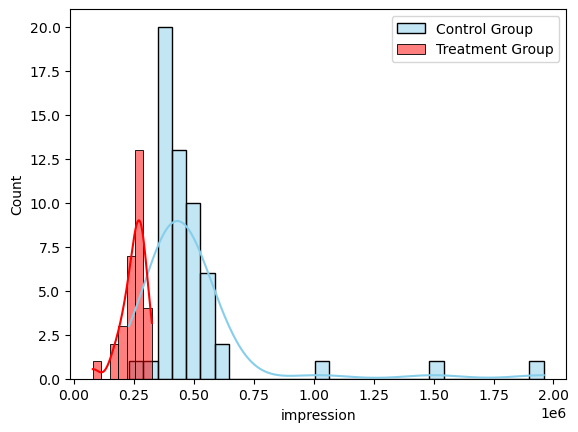

Box Plot by Groups for impression 



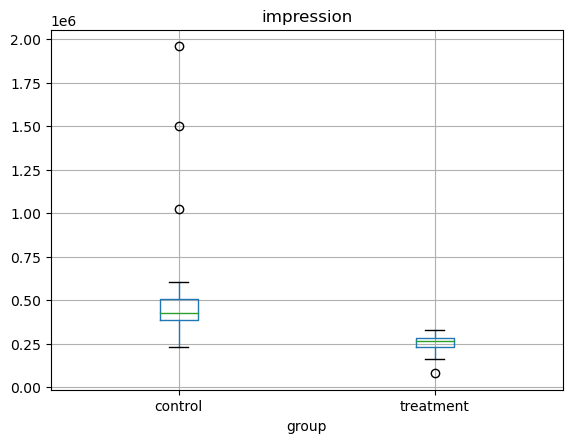

1. Step: Testing the Normality Assumption for impression 

control_group Shapiro-Wilk p-value = 0.000, treatment_group Shapiro-Wilk p-value = 0.007

Shapiro-Wilk Test: p < .05 for both groups; the distribution of impression is not normal.

3. Step: Mann-Whitney U Test for impression 

Mann-Whitney U Test: u-stat = 1659.000, p-value = 0.000

Mann-Whitney U Test: p < .05; significant difference in impression distributions between the groups.

Median of control_group in impression is greater than treatment_group

A/B Testing for call 

Summary Statistics by Groups for call 

group       control    treatment
count     56.000000    30.000000
mean     842.285714  2822.866667
std     1035.979742  1570.028107
median   478.500000  2788.000000
min      276.000000   590.000000
max     6268.000000  5004.000000 

Histogram by Groups for call 



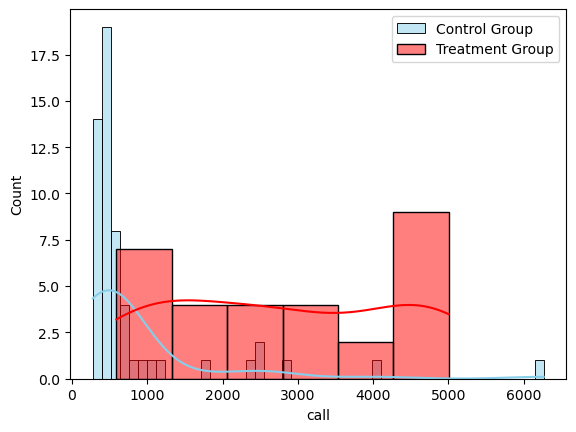

Box Plot by Groups for call 



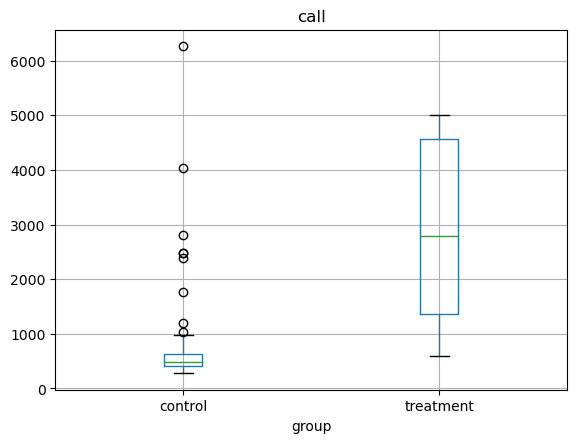

1. Step: Testing the Normality Assumption for call 

control_group Shapiro-Wilk p-value = 0.000, treatment_group Shapiro-Wilk p-value = 0.007

Shapiro-Wilk Test: p < .05 for both groups; the distribution of call is not normal.

3. Step: Mann-Whitney U Test for call 

Mann-Whitney U Test: u-stat = 141.000, p-value = 0.000

Mann-Whitney U Test: p < .05; significant difference in call distributions between the groups.

Median of treatment_group in call is greater than control_group

A/B Testing for imp/call 

Summary Statistics by Groups for imp/call 

group     control  treatment
count   56.000000  30.000000
mean     0.001792   0.011798
std      0.002238   0.007170
median   0.001122   0.010908
min      0.000328   0.002077
max      0.013166   0.026839 

Histogram by Groups for imp/call 



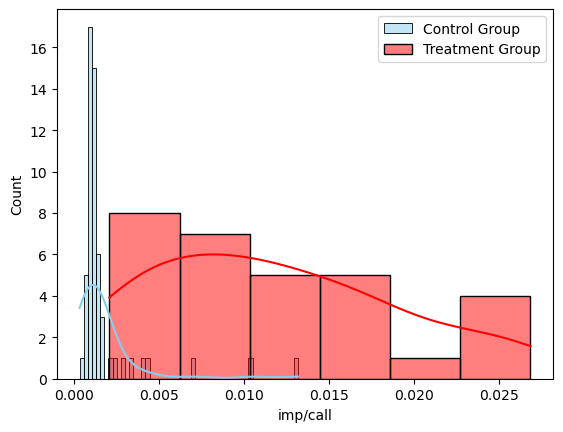

Box Plot by Groups for imp/call 



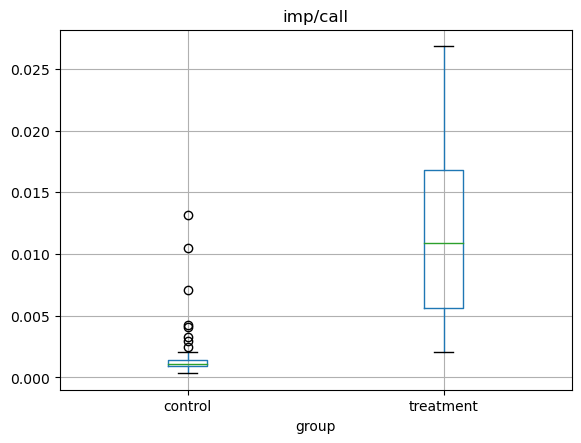

1. Step: Testing the Normality Assumption for imp/call 

control_group Shapiro-Wilk p-value = 0.000, treatment_group Shapiro-Wilk p-value = 0.100

Shapiro-Wilk Test: p > .05 for treatment_group and p < .05 for control_group; check for outliers in control_group.

3. Step: Mann-Whitney U Test for imp/call 

Mann-Whitney U Test: u-stat = 61.000, p-value = 0.000

Mann-Whitney U Test: p < .05; significant difference in imp/call distributions between the groups.

Median of treatment_group in imp/call is greater than control_group



In [11]:
a_b_test = ABTestAnalyzer(data)
for variable in variables:
    a_b_test.analyze_variable(variable)

### 4. Outlier Detection in call, control group

In [12]:
data.shape

(86, 4)

Lower Bound: 59.0, Upper Bound: 987.0
A/B Testing for call 

Summary Statistics by Groups for call 

group      control    treatment
count    47.000000    30.000000
mean    483.148936  2822.866667
std     127.296125  1570.028107
median  463.000000  2788.000000
min     276.000000   590.000000
max     973.000000  5004.000000 

Histogram by Groups for call 



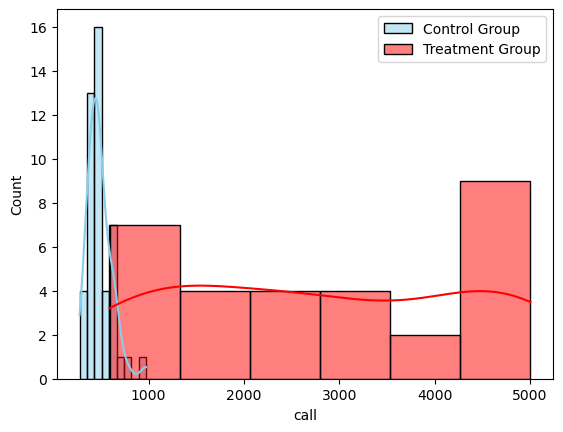

Box Plot by Groups for call 



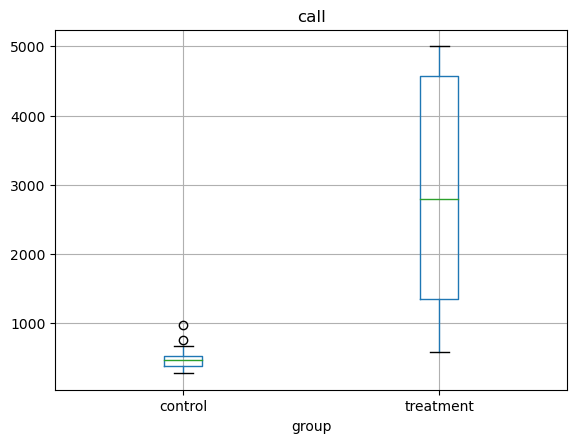

1. Step: Testing the Normality Assumption for call 

control_group Shapiro-Wilk p-value = 0.001, treatment_group Shapiro-Wilk p-value = 0.007

Shapiro-Wilk Test: p < .05 for both groups; the distribution of call is not normal.

3. Step: Mann-Whitney U Test for call 

Mann-Whitney U Test: u-stat = 17.000, p-value = 0.000

Mann-Whitney U Test: p < .05; significant difference in call distributions between the groups.

Median of treatment_group in call is greater than control_group



In [16]:
a_b_test = ABTestAnalyzer(data)
a_b_test.remove_outliers_iqr(a_b_test.control_group, 'call')
a_b_test.analyze_variable('call')